In [1]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\lenovo\.conda\envs\billy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data

In [2]:
# Filter only anomaly transactions data 
df = pd.read_csv("../data/result.csv")
df_anomaly = df[df['anomaly'] == 1].copy().reset_index(drop=True)
df_anomaly.head()

,hash_transaction,time,indegree,outdegree,in_btc,out_btc,total_in,total_out,mean_in_btc,mean_out_btc,...,fee_btc,unique_senders,unique_receivers,is_self_churn,sender_entropy,receiver_entropy,hour,day_of_week,total_btc,anomaly
0,75cadf3a934982e540ecb5bc0c3bf8cf4336f1475b920d...,2025-08-27 13:58:26,3.0,1.0,"[33.7842765, 98.68177598, 288.80501252]",[421.270065],421.271065,421.270065,140.423688,421.270065,...,0.001000,1,1,False,0.0000,1.110223e-16,13,Wednesday,842.541130,1
1,2f982e30d3b691863d2b372e28599946b4ea7265f8620e...,2025-08-27 13:58:26,7.0,2.0,"[101.83547114, 1.13326484, 103.0264275, 68.908...","[300.0, 0.515444]",300.515541,300.515444,42.930792,150.257722,...,0.000097,3,2,False,1.1488,1.000000e+00,13,Wednesday,601.030985,1
2,cd8e8d145f8d7e22d80b303fe1eef1c72142787e91cb2e...,2025-08-27 13:58:26,1.0,12.0,[1004.37928571],"[0.08584521, 0.0657621, 0.05287033, 0.00233289...",1004.379286,1004.379225,1004.379286,83.698269,...,0.000061,1,12,False,0.0000,3.585000e+00,13,Wednesday,2008.758511,1
3,8d19aaac1a8b12b6a26579b1a1eb83d17b6fc67f0e1383...,2025-08-27 13:29:42,1.0,2.0,[84.9],"[27.4, 57.499148]",84.900000,84.899148,84.900000,42.449574,...,0.000852,1,2,False,0.0000,1.000000e+00,13,Wednesday,169.799148,1
4,218f1f940bbdd062e402badbdc8d98264f788e4691f9b0...,2025-08-27 13:27:02,2.0,1.0,"[127.40469011, 294.32796841]",[421.73165852],421.732659,421.731659,210.866329,421.731659,...,0.001000,1,1,False,0.0000,1.110223e-16,13,Wednesday,843.464317,1


In [3]:
df_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hash_transaction  10 non-null     object 
 1   time              10 non-null     object 
 2   indegree          10 non-null     float64
 3   outdegree         10 non-null     float64
 4   in_btc            10 non-null     object 
 5   out_btc           10 non-null     object 
 6   total_in          10 non-null     float64
 7   total_out         10 non-null     float64
 8   mean_in_btc       10 non-null     float64
 9   mean_out_btc      10 non-null     float64
 10  senders           10 non-null     object 
 11  receivers         10 non-null     object 
 12  fee_btc           10 non-null     float64
 13  unique_senders    10 non-null     int64  
 14  unique_receivers  10 non-null     int64  
 15  is_self_churn     10 non-null     bool   
 16  sender_entropy    10 non-null     float64
 17  

## Plot

#### Anomaly Data

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
import json

# Import all transaction data
with open("../data/data.json", "r") as f:
    raw_data = json.load(f)

# Convert to DataFrame for easier filtering
raw_df = pd.DataFrame(raw_data)
raw_df.head()

,hash_transaction,time,indegree,outdegree,in_btc,out_btc,total_in,total_out,mean_in_btc,mean_out_btc,senders,receivers
0,b04b71e40e6ca4785ddfbd281136a0516059b0816b3d48...,2025-08-27 13:58:26,1,7,[0.0],"[5.46e-06, 3.18507404, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,3.185080,0.000000,0.455011,[],"[3Eif1JfqeMERRsQHtvGEacNN9hhuvnsfe9, 3Awm3FNpm..."
1,75cadf3a934982e540ecb5bc0c3bf8cf4336f1475b920d...,2025-08-27 13:58:26,3,1,"[33.7842765, 98.68177598, 288.80501252]",[421.270065],421.271065,421.270065,140.423688,421.270065,"[1ABwNuymdDWtSJYUbdJKMdgd3JTgLQx9LC, 1ABwNuymd...",[3MqUP6G1daVS5YTD8fz3QgwjZortWwxXFd]
2,3898b76379c8eaeec62416b6b8065e649192f590e37308...,2025-08-27 13:58:26,1,2,[0.01023954],"[0.00459135, 0.00554949]",0.010240,0.010141,0.010240,0.005070,[bc1qjlg095hjzmp4hgls9j3ccv3kkj8uv3zv7wtf03],"[bc1qp5la35u53l9v22p3fdmyf4u75s7kt5y3nvearr, b..."
3,0bbcfb1316bc1addfe387e875027f72a626ccb8fa67f6b...,2025-08-27 13:56:34,1,8,[0.03467014],"[0.00026899, 0.0043298, 0.00086129, 0.00270737...",0.034670,0.034460,0.034670,0.004308,[bc1q7jwr90fsjgfgqqfekdmctt5anjla3fasxd0pdljwv...,[bc1pmxx69tw2dn6cfqczrajyn7hrk56jghnpf8zg9ruq8...
4,7bc9c8a6257b9da09c10c22014e4b99212bcd5e23f73ce...,2025-08-27 13:56:58,1,1,[0.17228678],[0.17223826],0.172287,0.172238,0.172287,0.172238,[bc1q00wx9kn40k4s3u9a4kwk4gwnk7x6j4cx6xg9wz],[bc1qjn67wt5jy4s4c3ydj6q0qad2uraa6e4nefs6k2]


In [6]:
# Get hash_transaction anomaly for index 0 from df_anomaly
hash_tx = df_anomaly.iloc[1]["hash_transaction"]
print("Analyzing anomaly transaction:", hash_tx)

Analyzing anomaly transaction: 2f982e30d3b691863d2b372e28599946b4ea7265f8620e2755328eb1a5c6a399


In [7]:
tx_data = raw_df[raw_df["hash_transaction"] == hash_tx].iloc[0]
tx_data.head()

hash_transaction    2f982e30d3b691863d2b372e28599946b4ea7265f8620e...
time                                              2025-08-27 13:58:26
indegree                                                            7
outdegree                                                           2
in_btc              [101.83547114, 1.13326484, 103.0264275, 68.908...
Name: 32, dtype: object

In [8]:
def create_transaction_graph(hash_tx, tx_data):
    
    # === Build graph ===
    G = nx.DiGraph()
    
    # Add transaction node at center
    G.add_node(hash_tx, type="transaction", color="orange", size=1200)
    
    # Add edges from senders to transaction
    for sender, btc in zip(tx_data["senders"], tx_data["in_btc"]):
        G.add_node(sender, type="sender")
        G.add_edge(sender, hash_tx, weight=btc, type="input")
    
    # Add edges from transaction to receivers
    for receiver, btc in zip(tx_data["receivers"], tx_data["out_btc"]):
        G.add_node(receiver, type="receiver")
        G.add_edge(hash_tx, receiver, weight=btc, type="output")
    
    return G

In [9]:
def draw_transaction_graph(G, hash_tx, figsize=(8, 6)):

    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G, seed=42)

    # === Transaction node ===
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=[hash_tx],
        node_color="lightgreen",
        node_size=400,
        node_shape="o"
    )
    nx.draw_networkx_labels(
        G, pos,
        labels={hash_tx: "Transaction"},
        font_size=6,
        font_weight="bold"
    )

    # === Sender nodes ===
    senders = [n for n, d in G.nodes(data=True) if d.get("type") == "sender"]
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=senders,
        node_color="wheat",
        node_size=200
    )

    # === Receiver nodes ===
    receivers = [n for n, d in G.nodes(data=True) if d.get("type") == "receiver"]
    nx.draw_networkx_nodes(
        G, pos,
        nodelist=receivers,
        node_color="lightblue",
        node_size=200
    )

    # Labels for addresses (sender & receiver)
    labels = {n: n for n in G.nodes if n != hash_tx}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=6)

    # === Edges with labels ===
    nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, width=1)

    # Label edges with SENT + value
    edge_labels = {}
    for u, v, d in G.edges(data=True):
        if "weight" in d:
            edge_labels[(u, v)] = f"SENT\nvalue: {d['weight']} BTC"

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

    plt.title(f"Transaction Graph: {hash_tx[:12]}...", fontsize=10)
    plt.axis("off")
    plt.show()

In [10]:
G = create_transaction_graph(hash_tx, tx_data)

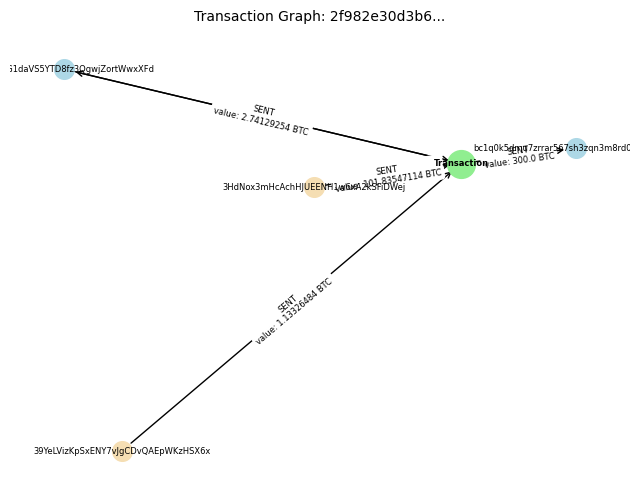

In [11]:
draw_transaction_graph(G, hash_tx)

#### Not Anomaly Data

In [12]:
# All data
df = pd.read_csv("../data/result.csv")
df.head()

,hash_transaction,time,indegree,outdegree,in_btc,out_btc,total_in,total_out,mean_in_btc,mean_out_btc,...,fee_btc,unique_senders,unique_receivers,is_self_churn,sender_entropy,receiver_entropy,hour,day_of_week,total_btc,anomaly
0,b04b71e40e6ca4785ddfbd281136a0516059b0816b3d48...,2025-08-27 13:58:26,1.0,7.0,[0.0],"[5.46e-06, 3.18507404, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,3.185080,4.440892e-16,0.455011,...,-3.185080,0,2,False,0.0,1.000000e+00,13,Wednesday,3.185080,0
1,75cadf3a934982e540ecb5bc0c3bf8cf4336f1475b920d...,2025-08-27 13:58:26,3.0,1.0,"[33.7842765, 98.68177598, 288.80501252]",[421.270065],421.271065,421.270065,1.404237e+02,421.270065,...,0.001000,1,1,False,0.0,1.110223e-16,13,Wednesday,842.541130,1
2,3898b76379c8eaeec62416b6b8065e649192f590e37308...,2025-08-27 13:58:26,1.0,2.0,[0.01023954],"[0.00459135, 0.00554949]",0.010240,0.010141,1.023954e-02,0.005070,...,0.000099,1,2,False,0.0,1.000000e+00,13,Wednesday,0.020380,0
3,0bbcfb1316bc1addfe387e875027f72a626ccb8fa67f6b...,2025-08-27 13:56:34,1.0,8.0,[0.03467014],"[0.00026899, 0.0043298, 0.00086129, 0.00270737...",0.034670,0.034460,3.467014e-02,0.004308,...,0.000210,1,8,False,0.0,3.000000e+00,13,Wednesday,0.069130,0
4,7bc9c8a6257b9da09c10c22014e4b99212bcd5e23f73ce...,2025-08-27 13:56:58,1.0,1.0,[0.17228678],[0.17223826],0.172287,0.172238,1.722868e-01,0.172238,...,0.000049,1,1,False,0.0,1.110223e-16,13,Wednesday,0.344525,0


In [13]:
# Top 10 indegree
top_in = df.sort_values("indegree", ascending=False).head(10)
print("Top 10 In-Degree:")
print(top_in[["hash_transaction", "indegree"]])

Top 10 In-Degree:
                                      hash_transaction  indegree
888  a453e2874dc441c41704b9f57bb5b923c1fbe632fb86a2...      38.0
880  eeb514ecb09045c7610396d8dcf873b18f02174aa2a269...      35.0
886  e1e7e96de41476973c9106fe2ce3b70c82247919c0695f...      34.0
447  81ae992baaba03ca33d770ceeb4642ec01488afe096a3e...      19.0
793  8fc32104300c903f5949b92adeab27b59dd4a1ed64bc86...      19.0
874  49d864d64326cb63dad6276827235bf6cc2e7e1b2f499b...      15.0
678  0920fa092a914ad72e5af714de2fd7ecb97cb3bf310ec1...      13.0
859  0ea16eef5e7416598813bb34f33ef3c33aae4af7231505...      13.0
861  be35acb85178b71cdd69a98d91aad577ac3ba66a8e55a7...      12.0
887  81bd1c0ed0de86df456b2f16fc790cefa055a9cffc3e88...      12.0


In [14]:
# Top 10 outdegree
top_out = df.sort_values("outdegree", ascending=False).head(10)
print("\nTop 10 Out-Degree:")
print(top_out[["hash_transaction", "outdegree"]])


Top 10 Out-Degree:
                                      hash_transaction  outdegree
907  4d50c11088eab147436635ce2a4689319986b91b8e896b...       30.0
925  2a29628c400c5bb9b95a6c875507b90e1663b762883b4c...       27.0
557  95f5024745967a4107943f86669b377fc53e37637ca4a2...       24.0
919  da59e7a66c749017b74ed36304b4d834e2c6b117f839a0...       23.0
476  540d0a185c12b725419e7c57be657bbd9d28d50bbef135...       23.0
429  2bdced5bb2d31fb48a3ed20c479f54954e8ae83350f920...       19.0
622  cb6c4e05d07bc12a3f05cf37225ddc892028dad6800ae6...       18.0
71   b7d2d63ac5f44f3ce89a72ba68db98eb1c5ea439947cf5...       17.0
229  e70cd2d9742ed75e8231edaea05faad49caa0937af448d...       16.0
499  7fec081f025e42e0c02f4ba5791f15c1c44220e00e1674...       16.0


In [15]:
# Get hash_transaction for index 0 from df
hash_tx = df.iloc[887]["hash_transaction"]
print("Analyzing transaction:", hash_tx)

Analyzing transaction: 81bd1c0ed0de86df456b2f16fc790cefa055a9cffc3e88d29805dbe80eee466a


In [16]:
tx_data = raw_df[raw_df["hash_transaction"] == hash_tx].iloc[0]
tx_data.head()

hash_transaction    81bd1c0ed0de86df456b2f16fc790cefa055a9cffc3e88...
time                                              2025-08-27 11:48:11
indegree                                                           12
outdegree                                                           2
in_btc              [0.0005113, 0.00051144, 0.00051127, 0.00057688...
Name: 887, dtype: object

In [17]:
tx_data

hash_transaction    81bd1c0ed0de86df456b2f16fc790cefa055a9cffc3e88...
time                                              2025-08-27 11:48:11
indegree                                                           12
outdegree                                                           2
in_btc              [0.0005113, 0.00051144, 0.00051127, 0.00057688...
out_btc                                      [0.00029299, 0.00584181]
total_in                                                     0.006213
total_out                                                    0.006135
mean_in_btc                                                  0.000518
mean_out_btc                                                 0.003067
senders             [3ErPQ1VW9S67o58xsDQw7r9NM4YFr4zhCH, 33WcvsaY1...
receivers           [bc1qlryqx0mgn50yr3d5ctz3pdklx6tca3mdlh5mrw68r...
Name: 887, dtype: object

In [18]:
G = create_transaction_graph(hash_tx, tx_data)

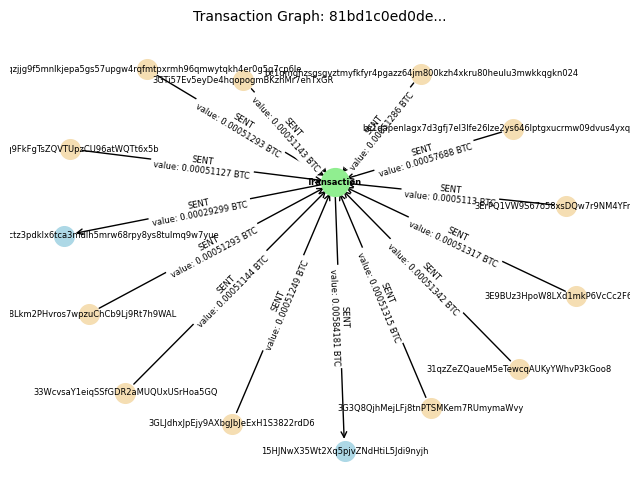

In [19]:
draw_transaction_graph(G, hash_tx)